<a href="https://colab.research.google.com/github/alagarde-bit/Computer-Vision/blob/main/lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4466 Computer Vision
## Lab 8 - Gradients and Edges
### 2/24/2022
### Alex Lagarde


In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

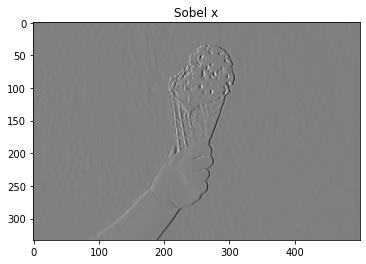

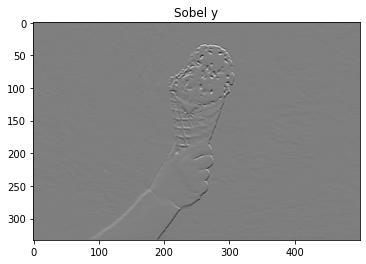

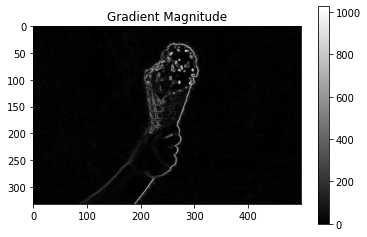

In [ ]:
# Gradients
img = cv2.imread('icecreamcone.JPG')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sob_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0)
plt.imshow(sob_x, cmap='gray')
plt.title('Sobel x')
plt.show()
sob_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1)
plt.imshow(sob_y, cmap='gray')
plt.title('Sobel y')
plt.show()
grad_mag = np.sqrt(sob_x**2 + sob_y**2)
plt.imshow(grad_mag, cmap='gray')
plt.title('Gradient Magnitude')
plt.colorbar()
plt.show()




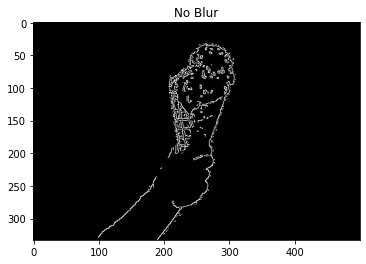

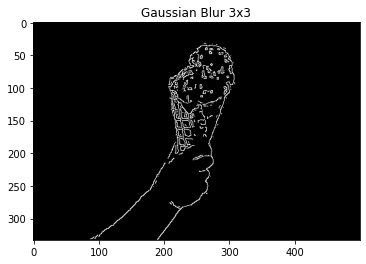

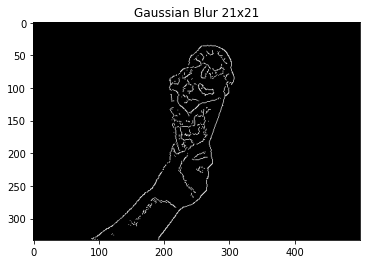

In [ ]:
edges = cv2.Canny(gray_img,150,200)
plt.imshow(edges, cmap='gray')
plt.title('No Blur')
plt.show()
gaussian = cv2.GaussianBlur(gray_img, (3, 3), 0)
edges2 = cv2.Canny(gaussian, 100, 130)
plt.imshow(edges2, cmap='gray')
plt.title('Gaussian Blur 3x3')
plt.show()
gaussian2 = cv2.GaussianBlur(gray_img, (21, 21), 0)
edges3 = cv2.Canny(gaussian2, 10,25)
plt.imshow(edges3, cmap='gray')
plt.title('Gaussian Blur 21x21')
plt.show()

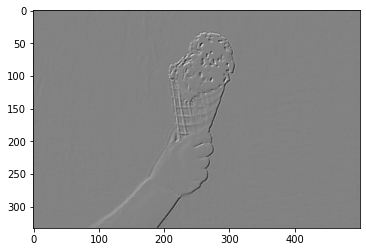

In [ ]:
kernel = np.array([[ -2,-2,0],
                   [-2,0,2],
                   [0,2,2]])
custom_filter = cv2.filter2D(gray_img, cv2.CV_64F, kernel)
plt.imshow(custom_filter, cmap = 'gray')
plt.show()

This custom 3x3 filter amplifies diagonals edges from the bottom left to the top right because it decreases pixel intensity above the diagonal and increases the pixel intensity below the diagonal. This kernel to me would make sense to  find 45 degree diagonal edges in the low left to high right direction of an image because if the three pixels in a 3x3 matrix that are diagonal in that same direction remain unchanged but the pixels around them grow or decrease, I am assuming the unchanged pixels are more highlighted than before, which makes for a more apparent edge